# DS-NYC-45 | Unit Project 4: Notebook with Executive Summary

In this project, you will summarize and present your analysis from Unit Projects 1-3.

> ## Question 1.  Introduction
> Write a problem statement for this project.

Answer: Using data from UCLA's Logit Regression in R tutorial, determine if there is a correlation between select application data (gre, gpa and prestige of alma mater) and admission to UCLA graduate school.

Link to my notebook: https://github.com/jeanacurro/jeana-curro-portfolio/blob/master/GA%20Final%20Project%203.ipynb

> ## Question 2.  Dataset
> Write up a description of your data and any cleaning that was completed.

Answer:  Our dataset contains four variables: `admit`, `gre`, `gpa`, and `prestige`:
- `admit` is a binary variable.  It indicates whether or not a candidate was admitted into UCLA (`admit = 1`) or not (`admit = 0`).
- `gre` is the GRE score.  GRE stands for Graduate Record Examination.
- `gpa` is the GPA score.  GPA stands for Grade Point Average.
- `prestige` is the prestige of an applicant alta mater, with 1 as highest tier (most prestigeous) and 4 as the lowest tier (least prestigious).

Variable | Description | Type of Variable
---|---|---
admit| 0 = Not admitted, 1 = admitted | Categorical (Binary)
gre | float | Continuous
gpa | integer | Continuous
prestige | Dictates prestige of alma mater (1= highest/most prestigious, 4= lowest/least prestigious) | Categorical (Ordinal)

Data was collected from 400 applications to UCLA graduate school (Time period unknown, which could be a risk to our analysis).  

Data cleaning was minimal.  There were only three null entries which we removed from our analysis.  

Also, our datasets appear normally distributed, which we tested for each variable by plotting histograms and checking that means and medians were close together.  Boxplots revealed no problematic outliers.  

Lastly we tested for colinearity using a correlation matrix and pairpots.  There is some colinearity btwn GPAs and GRE scores, but it is not overwhelmingly strong (~38%).  Our correlation also showed that prestige had the highest correlation with our outcome of admission (~-24%).  

Since our prestige variable is categorical, we had to take some extra steps to convert it into "dummy" binary variables in order to best incorporate it into our regression analysis.  

> ## Question 3.  Demo
> Provide a table that explains the data by admission status.

Answer:  we first need to pull in the data, we then show the data by admission

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import pylab as pl

df = pd.read_csv(os.path.join('..', 'DAT-NYC-45', 'unit-project','dataset', 'ucla-admissions.csv'))
df.dropna(inplace = True)

df.groupby(['admit']).describe().round(3)

gpa      gre  prestige
admit                                  
0     count  271.000  271.000   271.000
      mean     3.347  573.579     2.646
      std      0.376  116.053     0.919
      min      2.260  220.000     1.000
      25%      3.080  500.000     2.000
      50%      3.340  580.000     3.000
      75%      3.610  660.000     3.000
      max      4.000  800.000     4.000
1     count  126.000  126.000   126.000
      mean     3.489  618.571     2.151
      std      0.372  109.257     0.921
      min      2.420  300.000     1.000
      25%      3.220  540.000     1.000
      50%      3.545  620.000     2.000
      75%      3.758  680.000     3.000
      max      4.000  800.000     4.000

> ## Question 4. Methods
> Write up the methods used in your analysis.

Answer:  Since prestige was our variable most correlated with admission, we quickly calculated odds of admission ratios using data from our frequency tables.  

We then used a logistic regression model to predict the probability of admission into UCLA using gre, gpa, and the prestige of the undergraduate school as our variables.  We used the highest prestige (prestige = 1.0) undergraduate schools as our reference point, meaning we did not have a seperate feature for this in our dataset.  

We chose logistic regression because we wanted to predict the probability of our categorical variable, admission.  Logistic regression is useful when we want to explore a mathematical relationship among non-linear or categorical variables.  

We used both statsmodels and sklearn to build and test our logistic regression model.  

> ## Question 5. Results
> Write up your results.

Answer:  Based on our frequency tables, we found that:

1) The odds of admission for an applicant from the most prestigious undergraduate school (prestige = 1.0) was roughly 3 times that of all other applicants.

2) The odds of admission for students who attended the least prestigious undergraduates were roughly 40% of those from all other schools.  

Our logistic regression confirmed that odds of admission increased as gpa and gre increased and decreased as prestige score increased (remember higher prestige score = less prestigious institution).  For prestige = 1.0, gpa had the highest odds ratio of 218%, which we interpret as every 1-unit increase in GPA more than doubles the odds of admission (specifially increases the odds by ~118%).  

Our logisitc regression allowed us to calculate the probability of admission based on our variables.  Logistic regression results agree that probability of admission decreases as the prestige score of the undergradudate school increases.  For example, for a student with a GRE of 800 and a GPA of 4, we calculated that the probability of admission if he/she comes from a tier-1, tier-2, tier-3, or tier-4 undergraduate school is 71%, 57%, 41% and 34% respectively.  


> ## Question 6. Visuals
> Provide a table or visualization of these results.

Answer:  three steps: 
#### Step 1: 
First we quickly recreate our model in the two cells below:

In [2]:
df2=pd.concat([df, pd.get_dummies(df['prestige'],prefix='prestige')], axis=1)
df2=df2.drop(['prestige','prestige_1.0'],axis=1)
X=df2.drop(['admit'],axis=1)
X['intercept']=1
y=df['admit']

logreg=smf.Logit(y,X)
result=logreg.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### Step 2: summary table
The summary is below, with Odds Ratios immediately after.  Our coefficients tell us gre and gpa are positively correlated with admission while prestige score is negatively correlated.

In [3]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 Jan 2017   Pseudo R-squ.:                 0.08166
Time:                        21:59:38   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

In [4]:
np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

#### Step 3:  Charts
We plot probability of admission based on 1) gpa and 2) gre for all 4 levels of admission in two seperate charts

In [5]:
df2['admit_pred'] = result.predict(X)
df2['prestige']=df['prestige'].dropna()

def isolate_and_plot(variable):
    grouped = pd.pivot_table(df2, values=['admit_pred'], index=[variable,'prestige'],aggfunc=np.mean)
    for col in df2.prestige.unique():
        plt_df2 = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_df2.index.get_level_values(0), plt_df2['admit_pred'])
    
    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

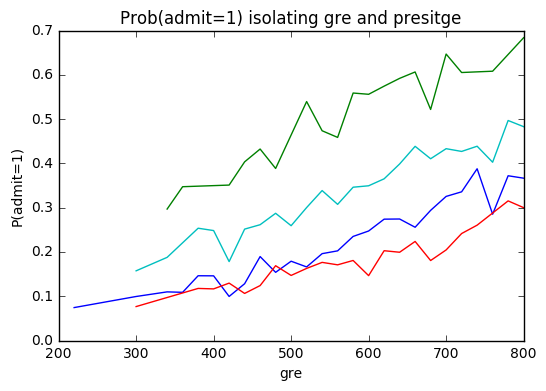

In [6]:
isolate_and_plot('gre')

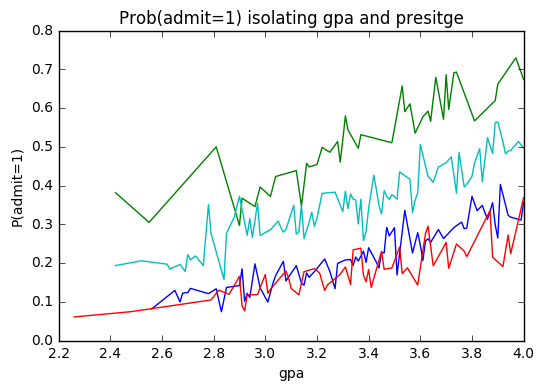

In [7]:
isolate_and_plot('gpa')

> ## Question 7.  Discussion
> Write up your discussion and future steps.

Answer: 

Our findings generally show that higher gres generally correlate with a greater probability of admission across prestige scores; likewise for higher gpas and probability of admission.  However, our charts are not "smooth" because we plotted the exact data points from our analysis, which uses three variables (gpa, gre and prestige) as input but the x axis only shows one (e.g. the first chart does not visualize what the gpas are, solely gre and prestige).  If we were to replicate the analysis, we may want to smooth the regression somehow, or run two independant regressions (one omitting gpa, the other omitting gre).

Also, we are not sure which time frame this data covers.  While our model may be useful in predicting admission for this given subset, we may want to consider whether it is applicable in the future.  

